In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve
from getBayer import getBayer, bayerGrid
% matplotlib inline
import io
import time
from numpy.lib.stride_tricks import as_strided

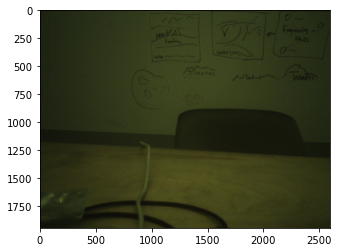

In [5]:
rgbIm = getBayer('wall2.pickle')
kernel = np.ones((3,3),dtype=np.uint8)
bayer_conv = np.zeros(bayerGrid.shape, dtype=np.uint8)
for i in range(3):
    bayer_conv[:,:,i] = convolve(bayerGrid[:,:,i], kernel, mode='same')
rgbConv = np.zeros(rgbIm.shape, dtype=np.uint16)  # max sum here should be 1275 for 5 maxed green sencels
for i in range(3):
    rgbConv[:,:,i] = convolve(rgbIm[:,:,i].astype(np.uint16), kernel, mode='same')
    
res = rgbConv / bayer_conv
res = res.astype(np.uint8)
import copy
testIm = copy.deepcopy(res)



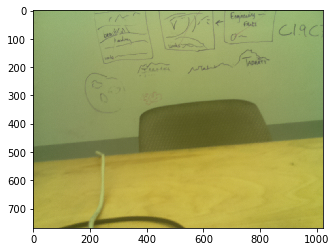

In [43]:
testIm = np.array(Image.open("wall1.jpeg"))
plt.imshow(testIm)

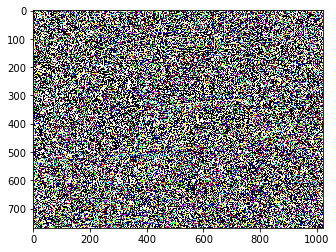

In [56]:
sharpen = np.array([[0, -1, 0 ], [-1, 4, -1], [0, -1, 0]]) * -1
sharpIm = np.zeros(testIm.shape, dtype=np.int16)
for i in range(3):
    sharpIm[:,:,i] = convolve(testIm[:,:,i].astype(np.int16), sharpen.astype(np.int16), mode='same')
sharpIm[sharpIm < 0] = 0
plt.imshow(sharpIm)

In [55]:
np.max(sharpIm)

353

In [52]:
0b111111111

511

In [31]:
np.max(testIm.astype(np.uint64))

101